In [2]:
import numpy as np
import pandas as pd
from numpy import nan
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
data_df_1 = pd.read_csv("df_cleaned_set1.csv")
data_df_2 = pd.read_csv("df_cleaned_set2.csv")
data_df_3 = pd.read_csv("df_cleaned_set3.csv")
data_df_1.drop(["class", "run"], inplace=True ,axis=1)
data_df_2.drop(["class", "run"], inplace=True, axis=1)

data_df = pd.concat([data_df_1, data_df_2, data_df_3], axis=1) # Merge data frames

data_df

CpuTemperature_vMax  CpuTemperature_vMin  CpuTemperature_vStd  \
0                    56.75                44.75             3.523729   
1                    63.25                54.25             2.895686   
2                    48.75                42.25             2.395308   
3                    63.75                54.50             3.155254   
4                    47.50                42.00             2.085815   
...                    ...                  ...                  ...   
39606                62.75                54.25             2.447065   
39607                54.75                49.00             1.977372   
39608                62.25                55.00             2.173850   
39609                58.25                50.00             2.260531   
39610                57.25                53.50             1.189538   

       CpuTemperature_value  DurationPickToPick_vCnt  \
0                 47.833333                        0   
1                 59.050000                        1   
2                 45.000000                        2   
3                 58.775000                        3   
4                 43.825000                        3   
...                     ...                      ...   
39606             56.825000                        2   
39607             51.950000                        2   
39608             57.675000                        4   
39609             51.800000                        4   
39610             55.350000                        3   

       DurationPickToPick_vFreq  DurationPickToPick_vMax  \
0                      0.000000                    3.192   
1                      0.099719                    3.215   
2                      0.198207                    3.192   
3                      0.298631                    3.250   
4                      0.296778                    3.230   
...                         ...                      ...   
39606                  0.199220                    3.122   
39607                  0.199214                    4.696   
39608                  0.398242                    6.854   
39609                  0.397878                    3.283   
39610                  0.297294                    3.214   

       DurationPickToPick_vMin  DurationPickToPick_vStd  \
0                        2.807                 0.192500   
1                        3.215                 0.000000   
2                        2.807                 0.192500   
3                        3.110                 0.058454   
4                        3.106                 0.051674   
...                        ...                      ...   
39606                    3.089                 0.016500   
39607                    2.722                 0.987000   
39608                    2.816                 1.683875   
39609                    2.805                 0.181359   
39610                    3.177                 0.017211   

       DurationPickToPick_vTrend  ...  VacuumValveClosed_vFreq  \
0                         0.3850  ...                 0.000000   
1                         0.0700  ...                 0.797749   
2                         0.3850  ...                 1.288343   
3                         0.0700  ...                 2.389048   
4                         0.0200  ...                 1.978518   
...                          ...  ...                      ...   
39606                    -0.0330  ...                 6.076211   
39607                    -1.9740  ...                 2.888605   
39608                    -1.0878  ...                 2.090771   
39609                    -0.1416  ...                 1.989390   
39610                    -0.0180  ...                 2.081060   

       VacuumValveClosed_vMax  VacuumValveClosed_vMin  VacuumValveClosed_vStd  \
0                   -0.382305               -0.715812                0.112918   
1                   -0.294900               -0.764153                0.154954   
2  

In [11]:
data_path = "D:/Datasets/PHME21/data_analysis"

fields_path = 'D:/Datasets/PHME21/training_validation_2/fields.csv'
fields_df = pd.read_csv(fields_path)
fields_df.columns = ['name', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6']

fields_dict = {}

for idx in range(fields_df.shape[0]):
    name = fields_df.loc[idx, 'name']

    _fields = []

    for f in fields_df.columns[1:]:
        if not (str(fields_df.loc[idx, f]) == 'nan'):
            _fields.append(name + "_" + str(fields_df.loc[idx, f]))

    fields_dict[idx] = {'name': fields_df.loc[idx, 'name'], 'fields': _fields}

print( fields_df.shape[0], fields_df['name'].tolist())

50 ['CpuTemperature', 'DurationPickToPick', 'DurationRobotFromFeederToTestBench', 'DurationRobotFromTestBenchToFeeder', 'DurationTestBenchClosed', 'EPOSCurrent', 'EPOSPosition', 'EPOSVelocity', 'ErrorFrame', 'FeederAction1', 'FeederAction2', 'FeederAction3', 'FeederAction4', 'FeederBackgroundIlluminationIntensity', 'FuseCycleDuration', 'FuseHeatSlope', 'FuseHeatSlopeNOK', 'FuseHeatSlopeOK', 'FuseIntoFeeder', 'FuseOutsideOperationalSpace', 'FusePicked', 'FuseTestResult', 'Humidity', 'IntensityTotalImage', 'IntensityTotalThermoImage', 'LightBarrieActiveTaskDuration2', 'LightBarrierActiveTaskDuration1', 'LightBarrierActiveTaskDuration1b', 'LightBarrierPassiveTaskDuration1', 'LightBarrierPassiveTaskDuration1b', 'LightBarrierPassiveTaskDuration2', 'LightBarrierTaskDuration', 'NumberEmptyFeeder', 'NumberFuseDetected', 'NumberFuseEstimated', 'Pressure', 'ProcessCpuLoadNormalized', 'ProcessMemoryConsumption', 'SharpnessImage', 'SmartMotorPositionError', 'SmartMotorSpeed', 'Temperature', 'Tempe

In [12]:
feature_set = list(data_df.columns)
feature_set

['CpuTemperature_vMax',
 'CpuTemperature_vMin',
 'CpuTemperature_vStd',
 'CpuTemperature_value',
 'DurationPickToPick_vCnt',
 'DurationPickToPick_vFreq',
 'DurationPickToPick_vMax',
 'DurationPickToPick_vMin',
 'DurationPickToPick_vStd',
 'DurationPickToPick_vTrend',
 'DurationPickToPick_value',
 'DurationRobotFromFeederToTestBench_vCnt',
 'DurationRobotFromFeederToTestBench_vFreq',
 'DurationRobotFromFeederToTestBench_vMax',
 'DurationRobotFromFeederToTestBench_vMin',
 'DurationRobotFromFeederToTestBench_vStd',
 'DurationRobotFromFeederToTestBench_vTrend',
 'DurationRobotFromFeederToTestBench_value',
 'DurationRobotFromTestBenchToFeeder_vCnt',
 'DurationRobotFromTestBenchToFeeder_vFreq',
 'DurationRobotFromTestBenchToFeeder_vMax',
 'DurationRobotFromTestBenchToFeeder_vMin',
 'DurationRobotFromTestBenchToFeeder_vStd',
 'DurationRobotFromTestBenchToFeeder_vTrend',
 'DurationRobotFromTestBenchToFeeder_value',
 'DurationTestBenchClosed_vCnt',
 'DurationTestBenchClosed_vFreq',
 'DurationTe

In [13]:
data_df.isnull().sum().any()

False

In [17]:
df = data_df.copy(deep=True)
df_data_ori = data_df.copy(deep=True)

In [18]:
df.shape

(39611, 205)

In [19]:
for column in df.columns:
    if column not in ["class", "run"]:
        if (len(df[column].unique()) == 1) or (df[column].isnull().all()):
            df.drop(column, inplace=True, axis=1)
            print(column, "droped-unique")

        else:
            zero_rows = df.loc[df[column] == float(0)]
            if zero_rows.shape[0] >= df.shape[0] * 50:
                df.drop(column, inplace=True, axis=1)
                print(column, "droped-zero")

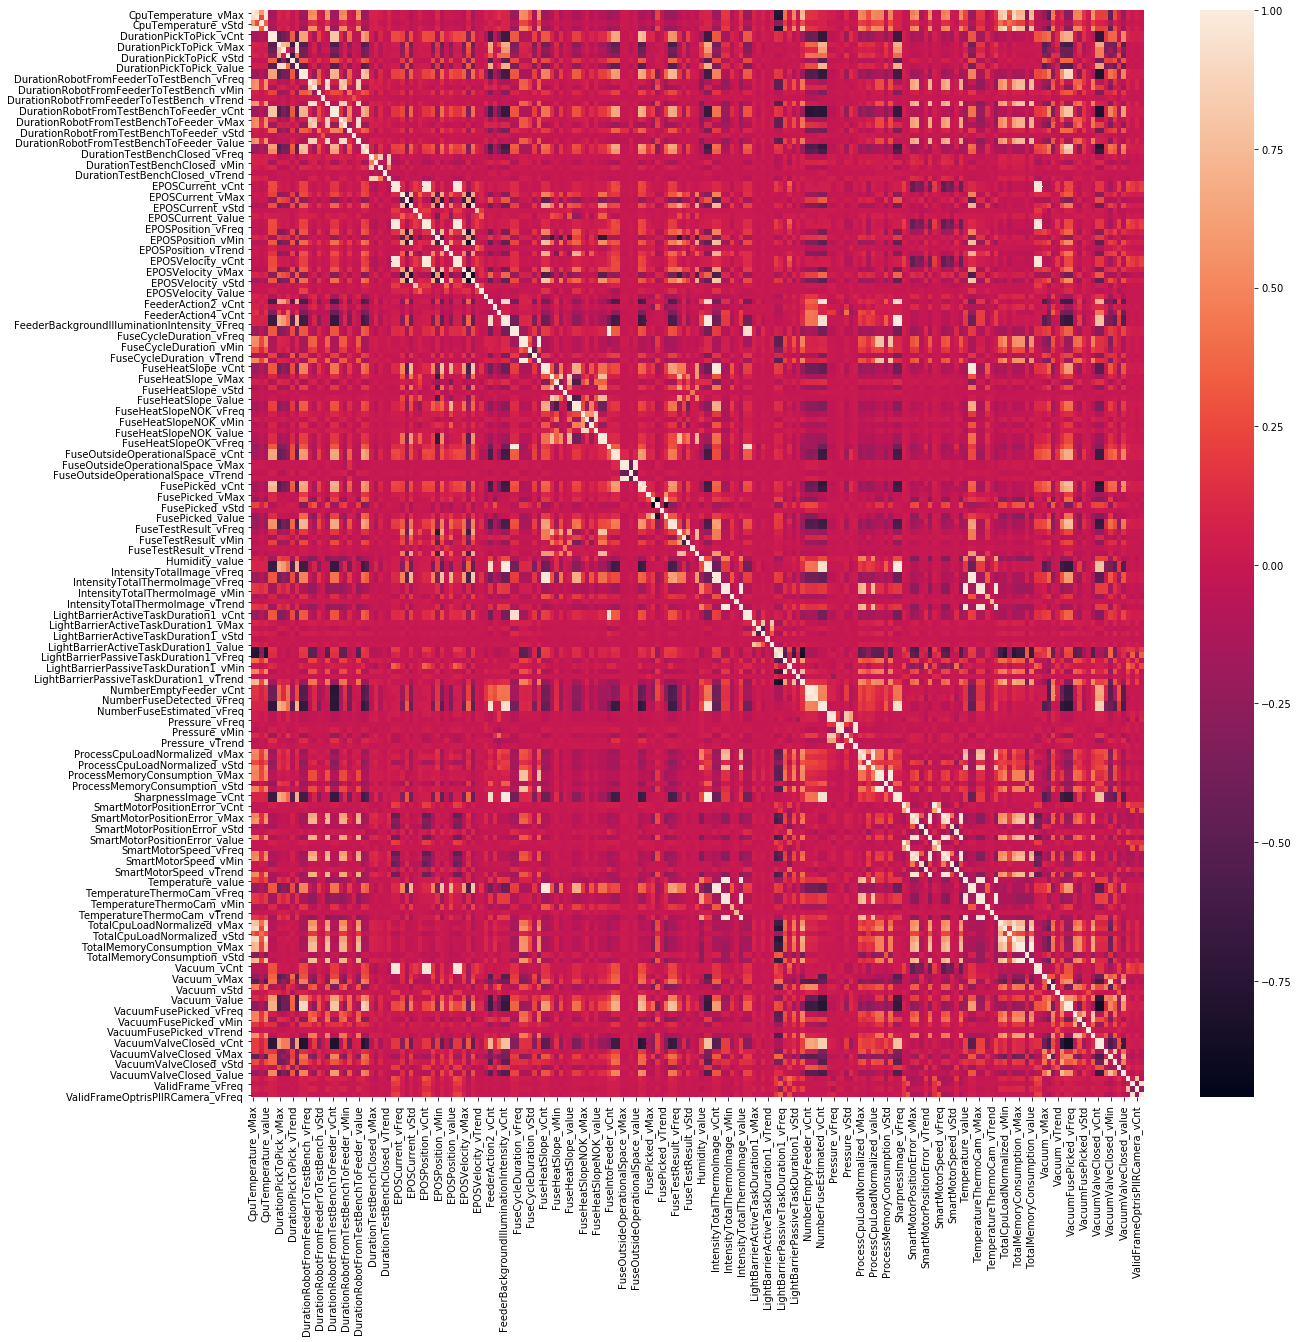

In [20]:
corr = df.drop(["class", "run"], axis=1).corr()
plt.figure (figsize=(20, 20))
sns.heatmap(corr, annot=False)

In [21]:
corr.style.background_gradient(cmap='Blues')

In [22]:
df

CpuTemperature_vMax  CpuTemperature_vMin  CpuTemperature_vStd  \
0                    56.75                44.75             3.523729   
1                    63.25                54.25             2.895686   
2                    48.75                42.25             2.395308   
3                    63.75                54.50             3.155254   
4                    47.50                42.00             2.085815   
...                    ...                  ...                  ...   
39606                62.75                54.25             2.447065   
39607                54.75                49.00             1.977372   
39608                62.25                55.00             2.173850   
39609                58.25                50.00             2.260531   
39610                57.25                53.50             1.189538   

       CpuTemperature_value  DurationPickToPick_vCnt  \
0                 47.833333                        0   
1                 59.050000                        1   
2                 45.000000                        2   
3                 58.775000                        3   
4                 43.825000                        3   
...                     ...                      ...   
39606             56.825000                        2   
39607             51.950000                        2   
39608             57.675000                        4   
39609             51.800000                        4   
39610             55.350000                        3   

       DurationPickToPick_vFreq  DurationPickToPick_vMax  \
0                      0.000000                    3.192   
1                      0.099719                    3.215   
2                      0.198207                    3.192   
3                      0.298631                    3.250   
4                      0.296778                    3.230   
...                         ...                      ...   
39606                  0.199220                    3.122   
39607                  0.199214                    4.696   
39608                  0.398242                    6.854   
39609                  0.397878                    3.283   
39610                  0.297294                    3.214   

       DurationPickToPick_vMin  DurationPickToPick_vStd  \
0                        2.807                 0.192500   
1                        3.215                 0.000000   
2                        2.807                 0.192500   
3                        3.110                 0.058454   
4                        3.106                 0.051674   
...                        ...                      ...   
39606                    3.089                 0.016500   
39607                    2.722                 0.987000   
39608                    2.816                 1.683875   
39609                    2.805                 0.181359   
39610                    3.177                 0.017211   

       DurationPickToPick_vTrend  ...  VacuumValveClosed_vFreq  \
0                         0.3850  ...                 0.000000   
1                         0.0700  ...                 0.797749   
2                         0.3850  ...                 1.288343   
3                         0.0700  ...                 2.389048   
4                         0.0200  ...                 1.978518   
...                          ...  ...                      ...   
39606                    -0.0330  ...                 6.076211   
39607                    -1.9740  ...                 2.888605   
39608                    -1.0878  ...                 2.090771   
39609                    -0.1416  ...                 1.989390   
39610                    -0.0180  ...                 2.081060   

       VacuumValveClosed_vMax  VacuumValveClosed_vMin  VacuumValveClosed_vStd  \
0                   -0.382305               -0.715812                0.112918   
1                   -0.294900               -0.764153                0.154954   
2  

In [23]:
df_cleaned_set = df.copy(deep=True)

In [24]:
df = df_cleaned_set.copy()

In [25]:
df_cleaned_set.to_csv("df_cleaned_set.csv", index=False)

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import KFold
from lofo import LOFOImportance, Dataset, plot_importance

from lightgbm import LGBMClassifier

In [27]:
scaler_cols = list(set(df.columns).difference(["class", "run"]))
len(scaler_cols)

203

In [29]:
scaler = StandardScaler()
scaler_data = scaler.fit_transform(df[scaler_cols])
scaler_data = pd.DataFrame(scaler_data, index=df.index, columns=scaler_cols)
scaler_data

TemperatureThermoCam_vMin  NumberFuseEstimated_vCnt  \
0                      -1.766033                 -0.444307   
1                      -1.245497                  0.324026   
2                      -1.766033                  0.324026   
3                      -1.245497                 -0.444307   
4                      -1.854316                 -0.444307   
...                          ...                       ...   
39606                  -1.101878                  0.324026   
39607                   1.236667                  0.324026   
39608                  -1.104436                 -0.444307   
39609                   1.236862                 -0.444307   
39610                  -1.096830                 -0.444307   

       DurationTestBenchClosed_vCnt  Vacuum_vTrend  IntensityTotalImage_vFreq  \
0                         -3.566043      -0.540316                  -0.444213   
1                         -2.303624       1.233751                  -0.444213   
2                         -1.041206      -0.540316                   0.319866   
3                          0.221212      -0.299685                  -0.444213   
4                          1.483631       0.261365                  -0.444213   
...                             ...            ...                        ...   
39606                     -2.303624      -1.781102                  -0.444213   
39607                      0.221212       0.661326                   0.323749   
39608                      0.221212      -0.947366                  -0.444213   
39609                      0.221212       0.248915                  -0.444213   
39610                      0.221212       1.099014                   0.323773   

       FuseHeatSlopeNOK_vMin  FuseHeatSlope_value  EPOSCurrent_vMin  \
0                  -0.199223            -0.903699          1.874410   
1                   0.648336            -0.476632          2.792439   
2                  -0.199223            -0.903699          1.874410   
3                   0.648336            -0.476632          0.617110   
4                   0.492756            -0.409392         -1.019376   
...                      ...                  ...               ...   
39606              -0.842774             0.082024         -0.480533   
39607              -0.788517            -0.918749          0.437495   
39608              -1.213364            -1.560010          1.096081   
39609              -0.049670            -0.520933         -0.959505   
39610              -0.654914             0.819340         -0.560362   

       FuseTestResult_vCnt  EPOSVelocity_value  ...  FuseCycleDuration_vFreq  \
0                -3.514724            1.277218  ...                -3.203472   
1                -3.514724            0.029510  ...                -3.203472   
2                -1.026200            1.277218  ...                -3.203472   
3                 1.462325           -0.173684  ...                -3.203472   
4                 0.218062           -0.764239  ...                -0.933931   
...                    ...                 ...  ...                      ...   
39606            -1.026200            0.109330  ...                 0.217937   
39607             0.218062            1.020337  ...                 0.224271   
39608            -1.026200            0.334032  ...                 0.220642   
39609             1.462325            0.673072  ...                 0.219546   
39610             1.462325            1.056273  ...                 0.224381   

       ProcessCpuLoadNormalized_vMax  \
0                          -0.730898   
1                           2.216116   
2                           2.750316   
3                          -0.901396   
4                           2.654097   
...                              ...   
39606                      -0.848649   
39607                       1.094495   
39608                       0.051308   
39609                       1.261853   
39610                       0.02131

In [30]:
pca = PCA(n_components=0.95)

principalComponents = pca.fit_transform(scaler_data)
pc_columns = []
for i in range(1, pca.n_components_ + 1, 1):
    pc_columns.append('PC' + str(i))

pca_data = pd.DataFrame(data=principalComponents, columns=pc_columns, index=scaler_data.index)
pca_data

PC1        PC2        PC3        PC4        PC5       PC6  \
0      14.237330   9.022132  38.654087  21.358241  18.338705 -0.095161   
1      15.930968  12.815264  20.070332  14.020874   3.482529 -1.504459   
2       1.614311  -3.571599   3.943923   0.649933  -0.940414  2.024894   
3       0.974487   9.802150   3.818157  -0.972717  -1.011375  4.760610   
4      -4.053003  -1.558691   3.017259  -0.643332  -0.966410  3.689598   
...          ...        ...        ...        ...        ...       ...   
39606   5.610223   2.825346   1.189412  -4.476044   0.593546 -3.234484   
39607   2.083658  -2.429906  -3.594331   3.031565   0.408316  1.392158   
39608   1.598384   3.746697  -0.302541   2.541794  -6.141605 -0.119437   
39609  -1.792088  -0.536848  -3.459630   4.150173  -0.502677  1.869537   
39610  -3.648057   3.601197   0.073867  -3.558761   2.859454 -1.000542   

            PC7        PC8       PC9      PC10  ...      PC60      PC61  \
0     -1.094402   7.700652 -0.453217 -7.636557  ...  2.980388  6.347666   
1      1.211485  17.426315 -2.298335 -1.251481  ... -2.712006 -3.459398   
2     -1.196159  10.231743  3.042159 -0.980690  ... -0.037238  1.920393   
3      1.580514   9.183574 -1.671165  5.179511  ...  1.745857 -0.177761   
4     -0.538110   3.024823  1.547448  0.258995  ...  1.369401  1.080035   
...         ...        ...       ...       ...  ...       ...       ...   
39606 -6.916840   1.003745  0.257023  0.151614  ... -0.699245 -0.890334   
39607 -2.763485  -0.267797  1.531339 -0.686368  ... -0.436303 -0.567318   
39608  0.467012   0.655909 -0.081050 -0.653154  ... -0.744826  0.286570   
39609  0.664191  -1.385658  1.387357 -1.058840  ...  0.238682  0.392233   
39610  1.345342   2.613984 -0.719996 -0.681994  ...  0.084360 -0.443722   

           PC62      PC63      PC64      PC65      PC66      PC67      PC68  \
0     -4.633872 -1.742307 -0.828054  0.883827  4.235728  0.789131  0.629719   
1      0.999299  0.596482 -0.929311 -3.951426 -1.032117 -3.754851 -2.456798   
2     -1.064169  0.781722  0.936160 -0.094423  1.828481 -1.464805 -0.233432   
3     -0.329887  0.057351 -1.418443 -0.074744 -0.537798 -0.184674  0.905074   
4     -1.480441  0.306272  0.045663 -0.317519  0.198797 -0.939440 -0.271927   
...         ...       ...       ...       ...       ...       ...       ...   
39606  0.409456  0.157956 -0.775478  1.020334 -0.432034 -1.746444  0.223187   
39607 -0.135221 -0.872211 -0.552157 -0.167978  0.429274  0.639205 -0.106207   
39608  0.274497  0.935475  0.726323 -1.461433  0.981595  0.737129  0.381028   
39609 -0.737673 -1.072881 -0.137470  0.724666 -0.415686  0.786797 -1.173260   
39610  0.592868  1.131473 -0.635625  0.282555  0.298796  0.837365  0.684646   

           PC69  
0     -0.487249  
1     -1.138753  
2      0.848720  
3      1.089813  
4     -1.192129  
...         ...  
39606  0.667725  
39607  0.521734  
39608  0.538585  
39609 -1.266513  
39610 -0.677130  

[39611 rows x 69 columns]

In [31]:
train_df = pd.concat([scaler_data, df["class"]], axis=1)
train_df.shape

(39611, 204)

In [33]:
# extract a sample of the data
sample_df = train_df.sample(frac=0.25, random_state=0)

# define the validation scheme
cv = KFold(n_splits=5, shuffle=False, random_state=0)

In [34]:
# dataset = Dataset(df=sample_df, target="class", features=[col for col in train_df.columns if col != 'class'])
dataset = Dataset(df=train_df, target="class", features=[col for col in train_df.columns if col != 'class'])

In [35]:
model = LGBMClassifier()
lofo_imp = LOFOImportance(dataset, cv=cv, model=model, scoring="f1_micro")

In [36]:
# get the mean and standard deviation of the importances in pandas format
importance_df = lofo_imp.get_importance()

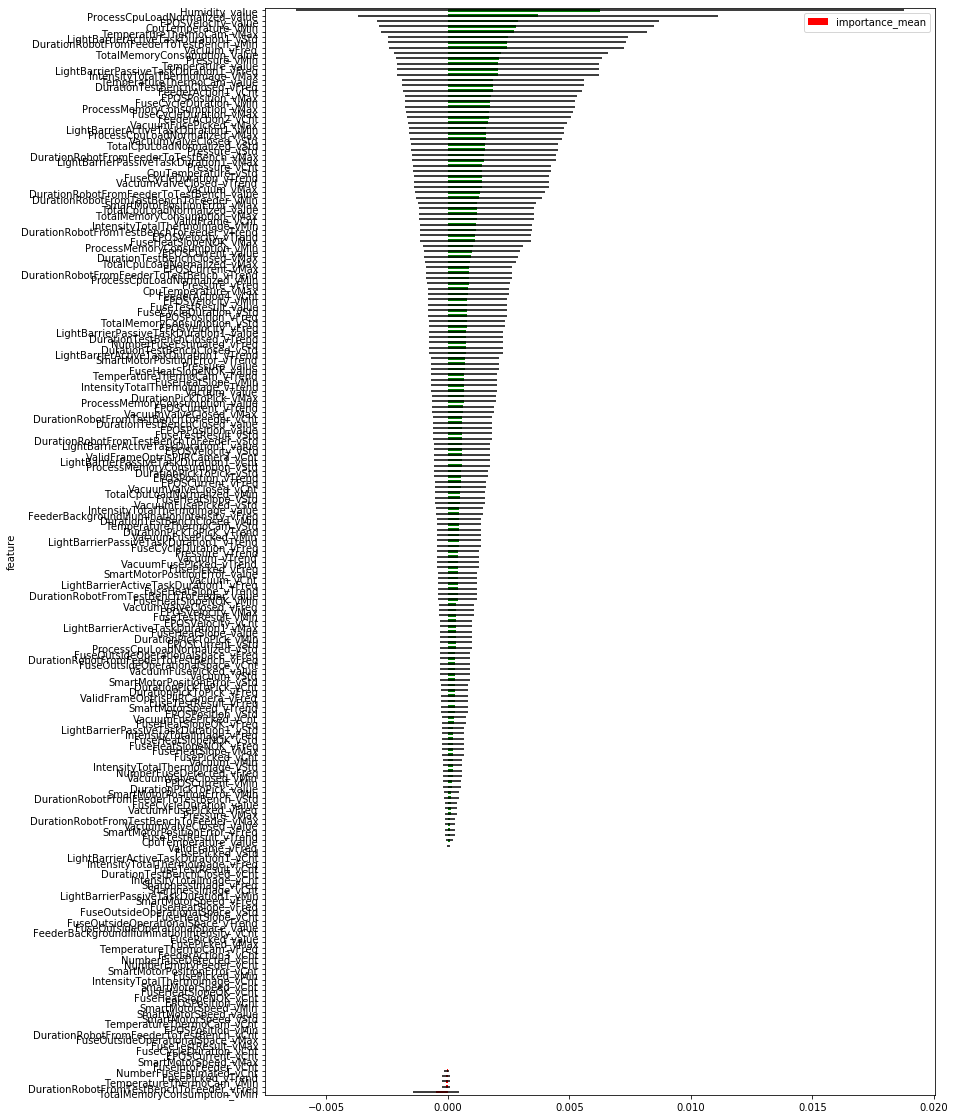

In [37]:
plot_importance(importance_df, figsize=(12, 20))